# Diabetes Prediction

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

### Data Collection and Analysis


In [2]:
# loading the diabetes dataset to a pandas DataFrame
diab_df = pd.read_csv('diabetes.csv')
diab_df.rename(columns={'DiabetesPedigreeFunction':'Diab_risk'},inplace=True)

In [3]:
# Diabetes Dataset along with the medical requirements needed for analysis
diab_df.style.background_gradient(cmap='PuBu')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diab_risk,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
5,5,116,74,0,0,25.600000,0.201000,30,0
6,3,78,50,32,88,31.000000,0.248000,26,1
7,10,115,0,0,0,35.300000,0.134000,29,0
8,2,197,70,45,543,30.500000,0.158000,53,1
9,8,125,96,0,0,0.000000,0.232000,54,1


In [4]:
# number of rows and Columns in this dataset
a,b=diab_df.shape
print("No. of rows are ",a)
print("No. of columns are ",b)

No. of rows are  768
No. of columns are  9


### Checking for missing values in the dataset

In [5]:
null_values=diab_df.isna().sum()
null_values

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Diab_risk        0
Age              0
Outcome          0
dtype: int64

No missing / null values

In [6]:
db1=diab_df.copy()
db1["Outcome"].replace({0:"Diabetic",1:"Non-Diabetic"},inplace=True)
print(db1.Outcome.value_counts().to_string())

Diabetic        500
Non-Diabetic    268


Text(0.5, 1.0, 'Analysis of given datadet')

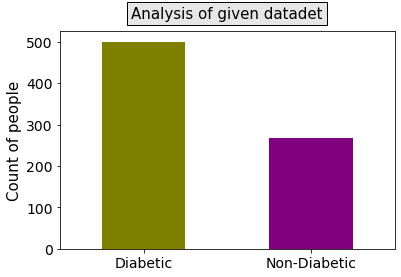

In [7]:
db1.Outcome.value_counts().plot.bar(color=['olive','purple'])
plt.xticks(rotation=0)
plt.tick_params(labelsize=14)
plt.ylabel("Count of people",size=15)
plt.title("Analysis of given datadet",size=15,pad=13,bbox={'facecolor':'0.9','pad':4})

In [8]:
# getting the statistical measures of the data
diab_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diab_risk,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
d=diab_df.groupby('Outcome').mean()
d 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diab_risk,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


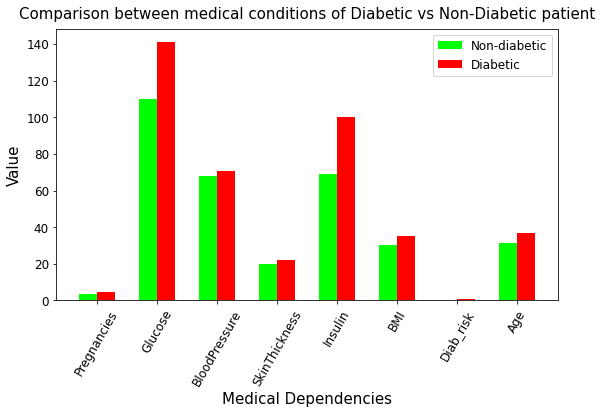

In [10]:
order=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Diab_risk', 'Age']
ran=np.arange(len(order))
plt.figure(figsize=(9,5))
plt.bar(ran-0.15,d.loc[0],width=0.3,color="lime",label="Non-diabetic")
plt.bar(ran+0.15,d.loc[1],width=0.3,color="red",label="Diabetic")
plt.xticks(ran,order,rotation=60)
plt.tick_params(labelsize=12)
plt.xlabel("Medical Dependencies",size=15)
plt.ylabel("Value",size=15)
plt.title("Comparison between medical conditions of Diabetic vs Non-Diabetic patient",size=15,pad=10)
plt.legend(fontsize=12)
plt.show()


From the above graph, we concluded that the main attributes responsible for the diagnosis is Glucose level and Insulin level of the person

In [11]:
# separating the data and labels
X = diab_df.drop(columns = 'Outcome', axis=1)
Y = diab_df['Outcome']

In [12]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     Diab_risk  Age  
0        0.627   50  
1        0.351   31  
2        0.672   32  
3        0.167   21  
4

In [13]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Data Standardization

Python sklearn library offers us with StandardScalar() function to perform standardization on the dataset

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(X)

StandardScaler()

In [16]:
standardized_data = scaler.transform(X)

In [17]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [18]:
X = standardized_data
Y = diab_df['Outcome']

In [19]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Train Test Split

80% data is used in training the model and rest in testing its precision

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Out of  total 768 rows, 614 are used in training the model

## Training the Model

svm import SVC for fitting a model. SVC, or Support Vector Classifier, is a supervised machine learning algorithm typically used for classification tasks. SVC works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes.

Here we have two classes:
1) Diabetic class  
2) Non-diabetic class

In [22]:
classifier = svm.SVC(kernel='linear')
# The function of kernel is to take data as input and transform it into the required form.
# We are using linear classification

In [23]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## Model Evaluation

### Accuracy Score

In [24]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [25]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [26]:
print('Accuracy score of the training data : ', training_data_accuracy)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.7866449511400652
Accuracy score of the test data :  0.7727272727272727


### Making a Predictive System

In [27]:
print("Please enter the following parameters for diagnosing the Diabetes and press enter")

if True:
    a=float(input("Number of pregnancies the female has had : "))
    b=float(input("The plasma glucose concentration of the person : "))
    c=float(input("Diastolic blood pressure of the person : "))
    d=float(input("Triceps skinfold thickness in mm :  "))
    e=float(input("Insulin level : "))
    f=float(input("Body Mass index : "))
    g=float(input("Diabetes pidegree function : "))
    h=float(input("Age of the person : "))
l=[a,b,c,d,e,f,g,h]

# changing the input data list to numpy array
input_data_as_numpy_array = np.asarray(l)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)

prediction = classifier.predict(std_data)

print("\nResult : ")

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

Please enter the following parameters for diagnosing the Diabetes and press enter
Number of pregnancies the female has had : 5
The plasma glucose concentration of the person : 166
Diastolic blood pressure of the person : 72
Triceps skinfold thickness in mm :  19
Insulin level : 175
Body Mass index : 25.8
Diabetes pidegree function : .587
Age of the person : 51

Result : 
The person is diabetic


Sample data : (5,166,72,19,175,25.8,0.587,51)